# Enhanced Sentiment Analyser for fused : Using Stacked Ensemble Learning 
## FUSION of all datasets carried out here to finally train the meta learners
We use four tools namely BERT, VADER, Textblob and Flair to give sentiment scores all of which are fed to a Logistic Regressor First.

## Basic Data Loading and Checking the Base Models or Tools

In [948]:
!pip install pandas

In [949]:
!pip install textblob

In [950]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import textblob
from scipy.spatial.distance import cdist
import seaborn as sns
import nltk
import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [1069]:
column_list = ['Headline','vader','textblob','bert','flair','Sentiment']#,'vader_polarity','textblob_polarity','bert_polarity','flair_polarity']
data_list = ['sentiment140','conversational','amazon','semeval','newsheadline']
df_full = pd.DataFrame(columns=column_list)

for i in data_list:
    dataset_analysis = pd.read_csv(i+'_test_results.csv')
    df_temp = dataset_analysis[column_list]
    df_full = pd.concat([df_full,df_temp],axis=0)

In [1070]:
df_full

,Headline,vader,textblob,bert,flair,Sentiment
0,"@kachoi85 Yay, so you ended up getting one",0.5267,0.0,0.970687,-0.541692,1
1,back at home after an awesome weekend Amstel G...,0.5848,0.5,0.968718,0.999210,-1
2,Text me,0.0000,0.0,0.000000,-0.991572,1
3,with no one,-0.2960,0.0,0.000000,0.567905,-1
4,@jessartisan Hey! You should be in the Lost th...,-0.3802,0.0,0.789971,-0.998410,1
...,...,...,...,...,...,...
1995,All 160 mediapersons tested by Delhi govt test...,-0.5719,-0.3,0.000000,-0.998196,1
1996,World Bank praises India's coronavirus contact...,0.5267,0.0,0.793041,0.759476,1
1997,"Punjab, Karnataka report their 1st cases of co...",0.0000,0.0,0.000000,-0.873879,-1
1998,Microsoft adds India-specific features to its ...,0.0000,0.0,0.000000,0.976000,1


In [1071]:
dataset_analysis = pd.DataFrame(df_full)

In [1072]:
def polarity(val):
    if val >= 0:
        return 1
    else:
        return -1

In [1073]:
dataset_analysis['vader_polarity'] = dataset_analysis.apply(lambda x: polarity(x['vader']), axis=1)
dataset_analysis['textblob_polarity'] = dataset_analysis.apply(lambda x: polarity(x['textblob']), axis=1)
dataset_analysis['bert_polarity'] = dataset_analysis.apply(lambda x: polarity(x['bert']), axis=1)
dataset_analysis['flair_polarity'] = dataset_analysis.apply(lambda x: polarity(x['flair']), axis=1)

## Training and Testing using Logistic Regressor

### Training and Checking 

In [1074]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [1075]:
mmscaler = MinMaxScaler()

In [1076]:
logmodel = LogisticRegression()


In [1077]:

our_data=dataset_analysis



In [1078]:
our_data.head()

,Headline,vader,textblob,bert,flair,Sentiment,vader_polarity,textblob_polarity,bert_polarity,flair_polarity
0,"@kachoi85 Yay, so you ended up getting one",0.5267,0.0,0.970687,-0.541692,1,1,1,1,-1
1,back at home after an awesome weekend Amstel G...,0.5848,0.5,0.968718,0.999210,-1,1,1,1,1
2,Text me,0.0000,0.0,0.000000,-0.991572,1,1,1,1,-1
3,with no one,-0.2960,0.0,0.000000,0.567905,-1,-1,1,1,1
4,@jessartisan Hey! You should be in the Lost th...,-0.3802,0.0,0.789971,-0.998410,1,-1,1,1,-1


In [1079]:
our_data['Sentiment']= our_data['Sentiment'].astype(float)

In [1080]:
X = our_data[['textblob','vader','bert','flair','vader_polarity','textblob_polarity','bert_polarity','flair_polarity','Sentiment','Headline']]
y = our_data['Sentiment']

In [1081]:
from sklearn.model_selection import train_test_split

In [1082]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [1083]:
y_test.shape



(2918,)

In [1084]:
len(X_train)

6808

In [1085]:
y_train = y_train

In [1086]:
X_train

,textblob,vader,bert,flair,vader_polarity,textblob_polarity,bert_polarity,flair_polarity,Sentiment,Headline
1021,0.000000,-0.6892,-0.706756,-0.998622,-1,1,-1,-1,-1.0,Oh man ! I â€™ Ve been starving myself for day...
1129,0.362187,0.9325,0.982926,0.998900,1,1,1,1,1.0,I got this for Christmas and I LOVE it!!! Ever...
1717,-0.015152,-0.2500,-0.775838,-0.998837,-1,-1,-1,-1,-1.0,"It didn't live up to the ""Black Friday"" hype I..."
1814,-0.300000,0.0000,0.000000,-0.880293,1,-1,1,-1,1.0,Will take at least 1.5 to 2 years to develop c...
1333,0.400000,-0.4404,0.000000,-0.970741,-1,1,1,-1,-1.0,"Rahulji, don't be Tablighi politician: Patra a..."
...,...,...,...,...,...,...,...,...,...,...
1055,1.000000,-0.7627,0.913094,0.980987,-1,1,1,1,1.0,@3minds I love @miahumphrey she's my boo!!!! ...
230,0.126042,-0.8024,-0.938966,-0.999998,-1,1,-1,-1,-1.0,"Not his best, but worst of all is the exceptio..."
1352,-1.000000,-0.4767,-0.813515,-0.912520,-1,-1,-1,-1,-1.0,I don't know if anything terrible has happene...
1871,0.000000,-0.5423,0.000000,-0.995543,-1,1,1,-1,-1.0,Act against those harassing Northeast people o...


In [1087]:
X_train_full = X_train
X_train = X_train[['vader','textblob','bert','flair']]
X_train = mmscaler.fit_transform(X_train)

In [1088]:
X_train_full.head()

,textblob,vader,bert,flair,vader_polarity,textblob_polarity,bert_polarity,flair_polarity,Sentiment,Headline
1021,0.000000,-0.6892,-0.706756,-0.998622,-1,1,-1,-1,-1.0,Oh man ! I â€™ Ve been starving myself for day...
1129,0.362187,0.9325,0.982926,0.998900,1,1,1,1,1.0,I got this for Christmas and I LOVE it!!! Ever...
1717,-0.015152,-0.2500,-0.775838,-0.998837,-1,-1,-1,-1,-1.0,"It didn't live up to the ""Black Friday"" hype I..."
1814,-0.300000,0.0000,0.000000,-0.880293,1,-1,1,-1,1.0,Will take at least 1.5 to 2 years to develop c...
1333,0.400000,-0.4404,0.000000,-0.970741,-1,1,1,-1,-1.0,"Rahulji, don't be Tablighi politician: Patra a..."


In [1089]:
X_test_full = X_test
X_test = X_test [['vader','textblob','bert','flair']]
X_test = mmscaler.fit_transform(X_test)


In [1090]:
logmodel.fit(X_train,y_train) # Outputs are -1 and 1

LogisticRegression()

In [1091]:
X_train

array([[1.46522927e-01, 5.00000000e-01, 1.31624253e-01, 6.88732943e-04],
       [9.67304383e-01, 6.81093750e-01, 9.94626329e-01, 9.99451577e-01],
       [3.68812633e-01, 4.92424242e-01, 9.63407004e-02, 5.81474187e-04],
       ...,
       [2.54074299e-01, 0.00000000e+00, 7.70975479e-02, 4.37396679e-02],
       [2.20872558e-01, 5.00000000e-01, 4.92598827e-01, 2.22841317e-03],
       [8.99382529e-01, 6.39393939e-01, 9.90062593e-01, 2.15384762e-03]])

In [1092]:
predictions = logmodel.predict(X_train)
probs = logmodel.predict_proba(X_train)


In [1093]:
xx =pd.DataFrame([{'vader':.8,'textblob':.4,'bert':.8,'flair':.62}])
tem = logmodel.predict_proba(xx)
tem



/Users/amitobe/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.13917461, 0.86082539]])

In [1094]:
probs.shape




(6808, 2)

In [1095]:
pd.array(y_train)

<PandasArray>
[-1.0,  1.0, -1.0,  1.0, -1.0,  1.0, -1.0, -1.0, -1.0,  1.0,
 ...
 -1.0,  1.0,  1.0,  1.0,  1.0,  1.0, -1.0, -1.0, -1.0,  1.0]
Length: 6808, dtype: float64

In [1096]:

probsdf = pd.DataFrame(probs)
probsdf['trth'] = pd.array(y_train)
#aplha = 0.80
#high_prob_data = probsdf[(probsdf[1] > aplha) | (probsdf[0] > aplha)]
#probsdf = high_prob_data
probsdf.shape


(6808, 3)

### ROC Curve Analysis

In [1097]:
import matplotlib
import matplotlib.pyplot as pyplot

Logistic: ROC AUC=0.903


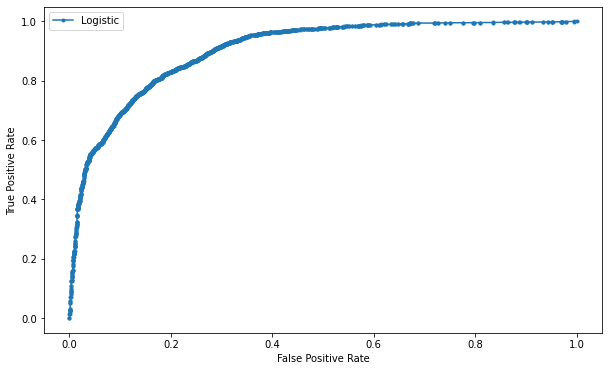

In [1098]:
lr_probs = probs[:,[1]]
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

lr_fpr, lr_tpr, thr = roc_curve(y_train, lr_probs)
# plot the roc curve for the model # pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [1099]:
optimal_idx = np.argmax(lr_tpr - lr_fpr) #we need to maximise TP-FP
thr[optimal_idx]

0.4116573262707081

In [1100]:
alpha_thresh = thr[optimal_idx]

def label_pol (prob_score):
    
    if prob_score[1] > alpha_thresh:
        return 1
    else:
       return -1


In [1101]:
probsdf['label_pol_pred'] = probsdf.apply (lambda row: label_pol(row), axis=1)
probsdf.head()



,0,1,trth,label_pol_pred
0,0.916474,0.083526,-1.0,-1
1,0.036488,0.963512,1.0,1
2,0.923688,0.076312,-1.0,-1
3,0.610041,0.389959,1.0,-1
4,0.642289,0.357711,-1.0,-1


In [1102]:
from sklearn import metrics
print(pd.DataFrame(metrics.classification_report(probsdf['trth'],probsdf['label_pol_pred'],output_dict=True)))




                  -1.0          1.0  accuracy    macro avg  weighted avg
precision     0.815594     0.818341   0.81698     0.816968      0.816979
recall        0.815111     0.818817   0.81698     0.816964      0.816980
f1-score      0.815353     0.818579   0.81698     0.816966      0.816980
support    3375.000000  3433.000000   0.81698  6808.000000   6808.000000


In [1103]:
probsdf

,0,1,trth,label_pol_pred
0,0.916474,0.083526,-1.0,-1
1,0.036488,0.963512,1.0,1
2,0.923688,0.076312,-1.0,-1
3,0.610041,0.389959,1.0,-1
4,0.642289,0.357711,-1.0,-1
...,...,...,...,...
6803,0.057507,0.942493,1.0,1
6804,0.952313,0.047687,-1.0,-1
6805,0.928214,0.071786,-1.0,-1
6806,0.648337,0.351663,-1.0,-1



### Data Capture Threshold Analysis

In [1104]:
threshold_analysis = pd.DataFrame({'Thresh_alpha':[0],'Accuracy':[0],'Percent_data_capture':[0],'Precision':[0],'Recall':[0],'f1':[0]})
detl_threshold = pd.DataFrame({'Thresh_alpha':[],'Accuracy':[],'Percent_data_capture':[],'Precision':[],'Recall':[],'f1':[]})
for i in range (4,92):
    alpha_th = i*.01
    res1 = pd.DataFrame(metrics.classification_report(probsdf['trth'][(probsdf[1]>alpha_th)|(probsdf[0]>alpha_th)],probsdf['label_pol_pred'][(probsdf[1]>alpha_th)|(probsdf[0]>alpha_th)],output_dict=True))
    threshold_analysis['Accuracy']= res1['accuracy'].iloc[0]
    threshold_analysis['Percent_data_capture'] = probsdf['trth'][(probsdf[1]>alpha_th)|(probsdf[0]>alpha_th)].count()/probsdf['trth'].count()
    threshold_analysis['Thresh_alpha'] = alpha_th
    threshold_analysis['Precision'] = res1['1.0'].loc['precision']
    threshold_analysis['Recall'] = res1['1.0'].loc['recall']
    threshold_analysis['f1'] = res1['1.0'].loc['f1-score']
    detl_threshold = detl_threshold.append(threshold_analysis)

In [1105]:
res1

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.971851,0.945465,0.957319,0.958658,0.957778
recall,0.935637,0.976289,0.957319,0.955963,0.957319
f1-score,0.953400,0.960630,0.957319,0.957015,0.957256
support,1476.000000,1687.000000,0.957319,3163.000000,3163.000000


In [1106]:
res1

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.971851,0.945465,0.957319,0.958658,0.957778
recall,0.935637,0.976289,0.957319,0.955963,0.957319
f1-score,0.953400,0.960630,0.957319,0.957015,0.957256
support,1476.000000,1687.000000,0.957319,3163.000000,3163.000000


In [1107]:
detl_threshold.head()

,Thresh_alpha,Accuracy,Percent_data_capture,Precision,Recall,f1
0,0.04,0.81698,1.0,0.818341,0.818817,0.818579
0,0.05,0.81698,1.0,0.818341,0.818817,0.818579
0,0.06,0.81698,1.0,0.818341,0.818817,0.818579
0,0.07,0.81698,1.0,0.818341,0.818817,0.818579
0,0.08,0.81698,1.0,0.818341,0.818817,0.818579


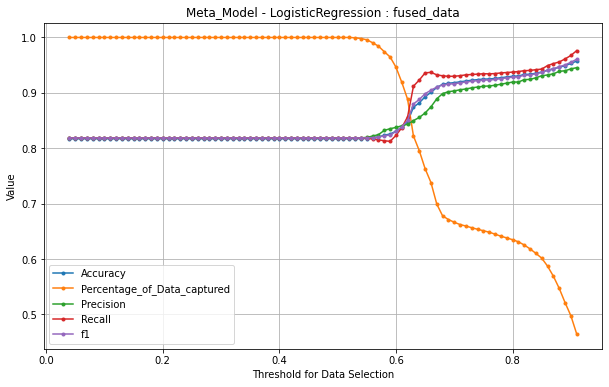

In [1108]:
plt.rcParams['figure.figsize'] = [10, 6]
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Accuracy'], marker='.', label='Accuracy')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Percent_data_capture'], marker='.', label='Percentage_of_Data_captured')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Precision'], marker='.', label='Precision')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Recall'], marker='.', label='Recall')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['f1'], marker='.', label='f1')
pyplot.xlabel('Threshold for Data Selection')
pyplot.ylabel('Value')
pyplot.grid(visible=True, which='both', axis='both')
#pyplot.grid(True)
pyplot.title('Meta_Model - LogisticRegression : fused_data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()  # we find that doe data selection threshold of 0.78 we should have good results; tradeoof is that we would miss 65% of dta and look at only 35% of data points for an assured accuracy of 90% and f1 score of approx .8

In [1109]:
np.unique(y_train,return_counts = True)  # we realise that the dataset is not balanced

(array([-1.,  1.]), array([3375, 3433]))

### We look at Precision Recall curve which is more promising since this dataset is imbalanced.

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432

In [1110]:
probsdf.head() # vector containing predicted prob for +1

,0,1,trth,label_pol_pred
0,0.916474,0.083526,-1.0,-1
1,0.036488,0.963512,1.0,1
2,0.923688,0.076312,-1.0,-1
3,0.610041,0.389959,1.0,-1
4,0.642289,0.357711,-1.0,-1


In [1111]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_train, probsdf[1])


In [1112]:
auc_pr = sklearn.metrics.auc(recall,precision)
auc_pr

0.8966491795505606

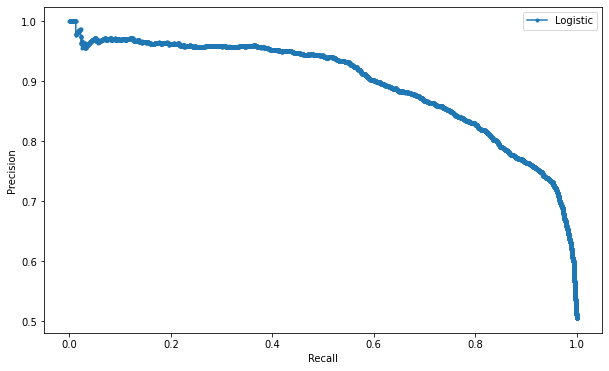

In [1113]:
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Model Test

In [1114]:
#we now test the logistic regressor
X_test.shape

(2918, 4)

In [1115]:
predictions_test = logmodel.predict(X_test)
probs_test = logmodel.predict_proba(X_test)

Logistic: ROC AUC=0.914


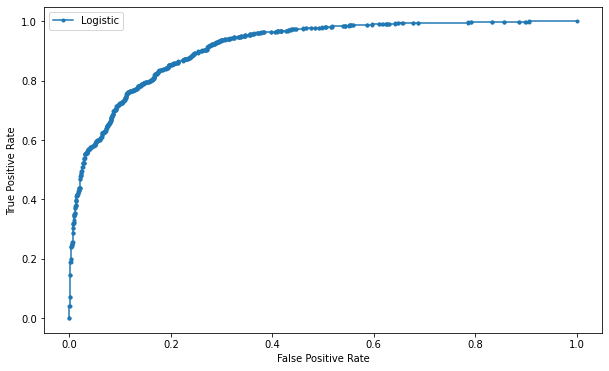

In [1116]:
lr_probs = probs_test[:,[1]]
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

lr_fpr, lr_tpr, thr = roc_curve(y_test, lr_probs)
# plot the roc curve for the model # pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [1117]:
optimal_idx = np.argmax(lr_tpr - lr_fpr) #we need to maximise TP-FP
thr[optimal_idx]

0.4068341358279781

In [1118]:
alpha_thresh = thr[optimal_idx]

def label_pol (prob_score):
    
    if prob_score[1] > alpha_thresh:
        return 1
    else:
       return -1

In [1119]:

probsdf_test = pd.DataFrame(probs_test)
probsdf_test['trth'] = y_test.to_numpy()
probsdf_test['label_pol_pred'] = probsdf_test.apply (lambda row: label_pol(row), axis=1)
probsdf_test.head()


,0,1,trth,label_pol_pred
0,0.936240,0.063760,-1.0,-1
1,0.255369,0.744631,-1.0,1
2,0.886741,0.113259,-1.0,-1
3,0.328482,0.671518,1.0,1
4,0.044089,0.955911,1.0,1


In [1120]:
print(pd.DataFrame(metrics.classification_report(probsdf_test['trth'],probsdf_test['label_pol_pred'],output_dict=True)))

                  -1.0          1.0  accuracy    macro avg  weighted avg
precision     0.835399     0.821965   0.82865     0.828682      0.828751
recall        0.822931     0.834488   0.82865     0.828709      0.828650
f1-score      0.829118     0.828179   0.82865     0.828648      0.828653
support    1474.000000  1444.000000   0.82865  2918.000000   2918.000000


In [1121]:
probsdf_test[['trth','label_pol_pred']].corr()

,trth,label_pol_pred
trth,1.000000,0.657391
label_pol_pred,0.657391,1.000000


In [1122]:
alpha_th_test = .7
probsdf_test['trth'][(probsdf_test[1]>alpha_th_test)|(probsdf_test[0]>alpha_th_test)].count()

1967

In [1123]:
print(pd.DataFrame(metrics.classification_report(probsdf_test['trth'][(probsdf_test[1]>alpha_th_test)|(probsdf_test[0]>alpha_th_test) ],probsdf_test['label_pol_pred'][(probsdf_test[1]>alpha_th_test)|(probsdf_test[0]>alpha_th_test)],output_dict=True)))

                  -1.0         1.0  accuracy    macro avg  weighted avg
precision     0.941414    0.903787  0.922725     0.922601      0.923414
recall        0.908382    0.938363  0.922725     0.923373      0.922725
f1-score      0.924603    0.920751  0.922725     0.922677      0.922760
support    1026.000000  941.000000  0.922725  1967.000000   1967.000000


In [1124]:
probsdf_test['trth'][(probsdf_test[1]>alpha_th)|(probsdf_test[0]>alpha_th)].count()/probsdf_test['trth'].count()

0.4671007539410555

In [1125]:
test_results=pd.DataFrame({'Prob':[],'label_pol_predict':[]})
test_results['Prob'] = probsdf_test[1]
test_results['label_pol_pred'] = probsdf_test['label_pol_pred']

### We need to analyse sentences
#### Also we need to compare with the four Base Models /  Tools

In [1126]:
X_test_full

,textblob,vader,bert,flair,vader_polarity,textblob_polarity,bert_polarity,flair_polarity,Sentiment,Headline
622,0.000000,-0.4449,-0.838282,-0.999628,-1,1,-1,-1,-1.0,@richardcalhoun Never believe the state / BB...
1199,0.003704,0.2714,0.601085,-0.911656,1,1,1,-1,-1.0,@renehasp Howdy! Tough to have a fun day when ...
1874,0.002778,-0.2164,-0.613837,-0.946635,-1,1,-1,-1,-1.0,Heading to bed forreal this time.. Tryna fall ...
112,0.000000,0.3818,0.000000,0.956065,1,1,1,1,1.0,Police stations will ensure door delivery of f...
1975,0.800000,0.7430,0.918201,0.998509,1,1,1,1,1.0,"Yeah , those classics from the great writers ."
...,...,...,...,...,...,...,...,...,...,...
1710,0.400000,0.5994,0.981321,0.998240,1,1,1,1,1.0,You bet your bottom dollar I saw Magic Mike XX...
251,0.000000,0.5994,0.968466,0.574648,1,1,1,1,1.0,God bless Angela Merkel and the people of Germ...
460,-0.400000,-0.5927,-0.784334,-0.996654,-1,-1,-1,-1,-1.0,just woke up. but i still feel soooo tired.
1039,-0.500000,-0.0772,-0.665070,-0.999867,-1,-1,-1,-1,-1.0,I'm sorry .


In [1127]:
result_base_tools_tb = pd.DataFrame(metrics.classification_report(X_test_full['Sentiment'],X_test_full['textblob_polarity'],output_dict=True))

In [1128]:
result_base_tools_vader = pd.DataFrame(metrics.classification_report(X_test_full['Sentiment'],X_test_full['vader_polarity'],output_dict=True))

In [1129]:
result_base_tools_bert = pd.DataFrame(metrics.classification_report(X_test_full['Sentiment'],X_test_full['bert_polarity'],output_dict=True))

In [1130]:
result_base_tools_flair = pd.DataFrame(metrics.classification_report(X_test_full['Sentiment'],X_test_full['flair_polarity'],output_dict=True))

In [1131]:
result_base_tools_tb

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.803448,0.568862,0.61549,0.686155,0.687361
recall,0.316147,0.921053,0.61549,0.618600,0.615490
f1-score,0.453749,0.703332,0.61549,0.578540,0.577257
support,1474.000000,1444.000000,0.61549,2918.000000,2918.000000


In [1132]:
result_base_tools_vader

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.838750,0.620869,0.680603,0.729809,0.730929
recall,0.455224,0.910665,0.680603,0.682944,0.680603
f1-score,0.590150,0.738349,0.680603,0.664249,0.663488
support,1474.000000,1444.000000,0.680603,2918.000000,2918.000000


In [1133]:
result_base_tools_bert

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.933202,0.724211,0.797121,0.828706,0.829781
recall,0.644505,0.952909,0.797121,0.798707,0.797121
f1-score,0.762440,0.822967,0.797121,0.792703,0.792392
support,1474.000000,1444.000000,0.797121,2918.000000,2918.000000


In [1134]:
result_base_tools_flair

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.764375,0.809560,0.784784,0.786967,0.786735
recall,0.829715,0.738920,0.784784,0.784317,0.784784
f1-score,0.795706,0.772629,0.784784,0.784167,0.784286
support,1474.000000,1444.000000,0.784784,2918.000000,2918.000000


In [1135]:
X_test_full

,textblob,vader,bert,flair,vader_polarity,textblob_polarity,bert_polarity,flair_polarity,Sentiment,Headline
622,0.000000,-0.4449,-0.838282,-0.999628,-1,1,-1,-1,-1.0,@richardcalhoun Never believe the state / BB...
1199,0.003704,0.2714,0.601085,-0.911656,1,1,1,-1,-1.0,@renehasp Howdy! Tough to have a fun day when ...
1874,0.002778,-0.2164,-0.613837,-0.946635,-1,1,-1,-1,-1.0,Heading to bed forreal this time.. Tryna fall ...
112,0.000000,0.3818,0.000000,0.956065,1,1,1,1,1.0,Police stations will ensure door delivery of f...
1975,0.800000,0.7430,0.918201,0.998509,1,1,1,1,1.0,"Yeah , those classics from the great writers ."
...,...,...,...,...,...,...,...,...,...,...
1710,0.400000,0.5994,0.981321,0.998240,1,1,1,1,1.0,You bet your bottom dollar I saw Magic Mike XX...
251,0.000000,0.5994,0.968466,0.574648,1,1,1,1,1.0,God bless Angela Merkel and the people of Germ...
460,-0.400000,-0.5927,-0.784334,-0.996654,-1,-1,-1,-1,-1.0,just woke up. but i still feel soooo tired.
1039,-0.500000,-0.0772,-0.665070,-0.999867,-1,-1,-1,-1,-1.0,I'm sorry .


In [1139]:
probsdf_test[0]

0       0.936240
1       0.255369
2       0.886741
3       0.328482
4       0.044089
          ...   
2913    0.038601
2914    0.050505
2915    0.928883
2916    0.899107
2917    0.947697
Name: 0, Length: 2918, dtype: float64

In [1138]:

probsdf_test[['textblob','vader','bert','flair','textblob_polarity','vader_polarity','bert_polarity','flair_polarity','Headline']]= X_test_full[['textblob','vader','bert','flair','textblob_polarity','vader_polarity','bert_polarity','flair_polarity','Headline']].to_numpy()
probsdf_test.rename(columns={'textblob':'tb'},inplace=True)


In [1140]:
probsdf_test1 = probsdf_test[['trth',0,1,'label_pol_pred','tb','vader','bert','flair','textblob_polarity','vader_polarity','bert_polarity','flair_polarity']].astype(float)


In [1141]:
probsdf_test1['Headline'] = probsdf_test['Headline']

In [1142]:
probsdf_test = probsdf_test1

In [1143]:
X_test_full

,textblob,vader,bert,flair,vader_polarity,textblob_polarity,bert_polarity,flair_polarity,Sentiment,Headline
622,0.000000,-0.4449,-0.838282,-0.999628,-1,1,-1,-1,-1.0,@richardcalhoun Never believe the state / BB...
1199,0.003704,0.2714,0.601085,-0.911656,1,1,1,-1,-1.0,@renehasp Howdy! Tough to have a fun day when ...
1874,0.002778,-0.2164,-0.613837,-0.946635,-1,1,-1,-1,-1.0,Heading to bed forreal this time.. Tryna fall ...
112,0.000000,0.3818,0.000000,0.956065,1,1,1,1,1.0,Police stations will ensure door delivery of f...
1975,0.800000,0.7430,0.918201,0.998509,1,1,1,1,1.0,"Yeah , those classics from the great writers ."
...,...,...,...,...,...,...,...,...,...,...
1710,0.400000,0.5994,0.981321,0.998240,1,1,1,1,1.0,You bet your bottom dollar I saw Magic Mike XX...
251,0.000000,0.5994,0.968466,0.574648,1,1,1,1,1.0,God bless Angela Merkel and the people of Germ...
460,-0.400000,-0.5927,-0.784334,-0.996654,-1,-1,-1,-1,-1.0,just woke up. but i still feel soooo tired.
1039,-0.500000,-0.0772,-0.665070,-0.999867,-1,-1,-1,-1,-1.0,I'm sorry .


In [1025]:
probsdf_test

,trth,label_pol_pred,tb,vader,bert,flair,textblob_polarity,vader_polarity,bert_polarity,flair_polarity,Headline
0,-1.0,-1.0,0.000000,0.0000,-0.926111,-0.999858,1.0,1.0,-1.0,-1.0,"Me too , it's so unreliable ."
1,1.0,1.0,0.000000,0.4574,0.834455,0.998365,1.0,1.0,1.0,1.0,@sonya_jonsgirl yes! There ya go
2,1.0,1.0,0.000000,0.0000,0.000000,0.988985,1.0,1.0,1.0,1.0,How have you been ?
3,-1.0,-1.0,0.091667,0.7256,-0.597453,-0.999997,1.0,1.0,-1.0,-1.0,To small to week even for the smallest of spac...
4,1.0,1.0,0.000000,0.5719,0.000000,0.965863,1.0,1.0,1.0,1.0,Shall we go to a restaurant to celebrate ?
...,...,...,...,...,...,...,...,...,...,...,...
2913,-1.0,-1.0,0.000000,0.1027,0.000000,-0.931965,1.0,1.0,1.0,-1.0,"Arsenal defender, Mathieu Debuchy has been lin..."
2914,-1.0,-1.0,0.100000,0.0000,-0.633735,-0.999213,1.0,1.0,-1.0,-1.0,I have read the breakup workbook by MJ Acharya...
2915,1.0,1.0,0.057656,0.9743,0.930086,0.999761,1.0,1.0,1.0,1.0,Monkey Island is great!It's really fun and fun...
2916,-1.0,1.0,0.800000,0.4215,0.000000,-0.876222,1.0,1.0,1.0,-1.0,"@Wriggy Lol, I haven't got GH yet"


In [1026]:
abs(probsdf_test['vader']).describe()

count    2918.000000
mean        0.417844
std         0.313802
min         0.000000
25%         0.077200
50%         0.421500
75%         0.674825
max         0.997100
Name: vader, dtype: float64

In [1027]:
alpha_th_test = .48
pd.DataFrame(metrics.classification_report(probsdf_test['trth'][abs(probsdf_test['vader'])>alpha_th_test],probsdf_test['vader_polarity'][abs(probsdf_test['vader'])>alpha_th_test],output_dict=True))

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.874667,0.742697,0.781818,0.808682,0.800805
recall,0.588869,0.933616,0.781818,0.761242,0.781818
f1-score,0.703863,0.827284,0.781818,0.765573,0.772940
support,557.000000,708.000000,0.781818,1265.000000,1265.000000


In [1028]:
abs(probsdf_test['bert']).describe()

count    2918.000000
mean        0.568685
std         0.394916
min         0.000000
25%         0.000000
50%         0.733084
75%         0.912428
max         0.992716
Name: bert, dtype: float64

In [1029]:
alpha_th_test = .78
res2 =pd.DataFrame(metrics.classification_report(probsdf_test['trth'][abs(probsdf_test['bert'])>alpha_th_test],probsdf_test['label_pol_pred'][abs(probsdf_test['bert'])>alpha_th_test],output_dict=True))
res2

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.979381,0.941255,0.957926,0.960318,0.958843
recall,0.928339,0.983264,0.957926,0.955801,0.957926
f1-score,0.953177,0.961801,0.957926,0.957489,0.957823
support,614.000000,717.000000,0.957926,1331.000000,1331.000000


In [1030]:
try:
    res2['1']
except KeyError:
    0

In [1031]:
from sklearn import metrics
from sklearn.metrics import classification_report

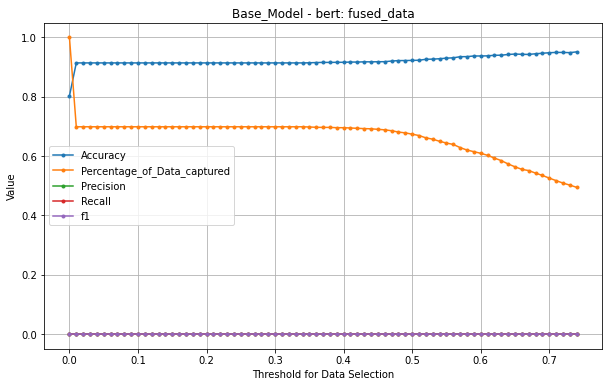

In [1032]:
threshold_analysis = pd.DataFrame({'Thresh_alpha':[0],'Accuracy':[0],'Percent_data_capture':[0],'Precision':[0],'Recall':[0],'f1':[0]})
detl_threshold = pd.DataFrame({'Thresh_alpha':[],'Accuracy':[],'Percent_data_capture':[],'Precision':[],'Recall':[],'f1':[]})
for i in range (0,75):
    alpha_th = i*.01
    res1 = pd.DataFrame(classification_report(probsdf_test['trth'][abs(probsdf_test['bert'])>=alpha_th],probsdf_test['bert_polarity'][abs(probsdf_test['bert'])>=alpha_th],output_dict=True))
    threshold_analysis['Accuracy']= res1['accuracy'].loc['precision']
    threshold_analysis['Percent_data_capture'] =  probsdf_test['trth'][abs(probsdf_test['bert'])>=alpha_th].count()/probsdf_test['trth'].count() if  probsdf_test['trth'].count()>0 else 0
    threshold_analysis['Thresh_alpha'] = alpha_th
    try:
        threshold_analysis['Precision'] = res1['1'].loc['precision']
    except KeyError:
        threshold_analysis['Precision']=0
    try:
        threshold_analysis['Recall'] = res1['1'].loc['recall']
    except KeyError:
       threshold_analysis['Recall'] =0
    try:
        threshold_analysis['f1'] = res1['1'].loc['f1-score']
    except KeyError:
        threshold_analysis['f1'] 
    detl_threshold = detl_threshold.append(threshold_analysis)

plt.rcParams['figure.figsize'] = [10, 6]
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Accuracy'], marker='.', label='Accuracy')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Percent_data_capture'], marker='.', label='Percentage_of_Data_captured')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Precision'], marker='.', label='Precision')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Recall'], marker='.', label='Recall')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['f1'], marker='.', label='f1')
pyplot.xlabel('Threshold for Data Selection')
pyplot.ylabel('Value')
pyplot.grid(visible=True, which='both', axis='both')
#pyplot.grid(True)
pyplot.title('Base_Model - bert: fused_data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

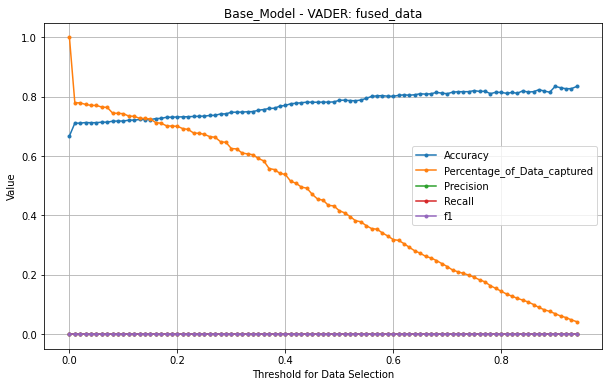

In [1033]:
threshold_analysis = pd.DataFrame({'Thresh_alpha':[0],'Accuracy':[0],'Percent_data_capture':[0],'Precision':[0],'Recall':[0],'f1':[0]})
detl_threshold = pd.DataFrame({'Thresh_alpha':[],'Accuracy':[],'Percent_data_capture':[],'Precision':[],'Recall':[],'f1':[]})
for i in range (0,95):
    alpha_th = i*.01
    res1 = pd.DataFrame(classification_report(probsdf_test['trth'][abs(probsdf_test['vader'])>=alpha_th],probsdf_test['vader_polarity'][abs(probsdf_test['vader'])>=alpha_th],output_dict=True))
    threshold_analysis['Accuracy']= res1['accuracy'].iloc[0]
    threshold_analysis['Percent_data_capture'] = probsdf_test['trth'][abs(probsdf_test['vader'])>=alpha_th].count()/probsdf_test['trth'].count()
    threshold_analysis['Thresh_alpha'] = alpha_th
    try:
        threshold_analysis['Precision'] = res1['1'].loc['precision']
        threshold_analysis['Recall'] = res1['1'].loc['recall']
        threshold_analysis['f1'] = res1['1'].loc['f1-score']
    except KeyError:
        threshold_analysis['Precision'] = 0
        threshold_analysis['Recall'] = 0
        threshold_analysis['f1'] = 0
    detl_threshold = detl_threshold.append(threshold_analysis)

plt.rcParams['figure.figsize'] = [10, 6]
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Accuracy'], marker='.', label='Accuracy')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Percent_data_capture'], marker='.', label='Percentage_of_Data_captured')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Precision'], marker='.', label='Precision')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Recall'], marker='.', label='Recall')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['f1'], marker='.', label='f1')
pyplot.xlabel('Threshold for Data Selection')
pyplot.ylabel('Value')
pyplot.grid(visible=True, which='both', axis='both')
#pyplot.grid(True)
pyplot.title('Base_Model - VADER: fused_data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

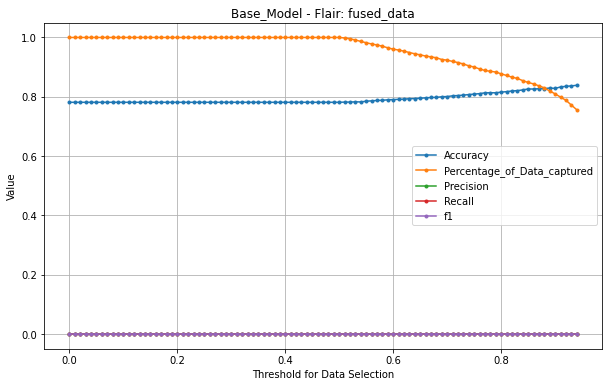

In [1034]:
threshold_analysis = pd.DataFrame({'Thresh_alpha':[0],'Accuracy':[0],'Percent_data_capture':[0],'Precision':[0],'Recall':[0],'f1':[0]})
detl_threshold = pd.DataFrame({'Thresh_alpha':[],'Accuracy':[],'Percent_data_capture':[],'Precision':[],'Recall':[],'f1':[]})
for i in range (0,95):
    alpha_th = i*.01
    res1 = pd.DataFrame(classification_report(probsdf_test['trth'][abs(probsdf_test['flair'])>=alpha_th],probsdf_test['flair_polarity'][abs(probsdf_test['flair'])>=alpha_th],output_dict=True))
    threshold_analysis['Accuracy']= res1['accuracy'].iloc[0]
    threshold_analysis['Percent_data_capture'] = probsdf_test['trth'][abs(probsdf_test['flair'])>=alpha_th].count()/probsdf_test['trth'].count()
    threshold_analysis['Thresh_alpha'] = alpha_th
    try:
        threshold_analysis['Precision'] = res1['1'].loc['precision']
        threshold_analysis['Recall'] = res1['1'].loc['recall']
        threshold_analysis['f1'] = res1['1'].loc['f1-score']
    except KeyError:
        threshold_analysis['Precision'] = 0
        threshold_analysis['Recall'] = 0
        threshold_analysis['f1'] = 0
    detl_threshold = detl_threshold.append(threshold_analysis)

plt.rcParams['figure.figsize'] = [10, 6]
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Accuracy'], marker='.', label='Accuracy')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Percent_data_capture'], marker='.', label='Percentage_of_Data_captured')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Precision'], marker='.', label='Precision')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Recall'], marker='.', label='Recall')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['f1'], marker='.', label='f1')
pyplot.xlabel('Threshold for Data Selection')
pyplot.ylabel('Value')
pyplot.grid(visible=True, which='both', axis='both')
#pyplot.grid(True)
pyplot.title('Base_Model - Flair: fused_data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

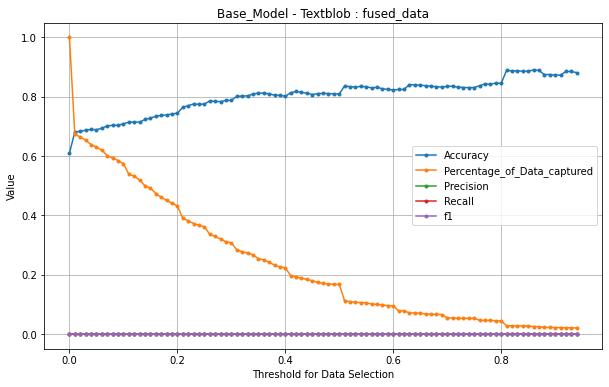

In [1035]:
threshold_analysis = pd.DataFrame({'Thresh_alpha':[0],'Accuracy':[0],'Percent_data_capture':[0],'Precision':[0],'Recall':[0],'f1':[0]})
detl_threshold = pd.DataFrame({'Thresh_alpha':[],'Accuracy':[],'Percent_data_capture':[],'Precision':[],'Recall':[],'f1':[]})
for i in range (0,95):
    alpha_th = i*.01
    res1 = pd.DataFrame(classification_report(probsdf_test['trth'][abs(probsdf_test['tb'])>=alpha_th],probsdf_test['textblob_polarity'][abs(probsdf_test['tb'])>=alpha_th],output_dict=True))
    threshold_analysis['Accuracy']= res1['accuracy'].iloc[0]
    threshold_analysis['Percent_data_capture'] = probsdf_test['trth'][abs(probsdf_test['tb'])>=alpha_th].count()/probsdf_test['trth'].count()
    threshold_analysis['Thresh_alpha'] = alpha_th
    try:
        threshold_analysis['Precision'] = res1['1'].loc['precision']
        threshold_analysis['Recall'] = res1['1'].loc['recall']
        threshold_analysis['f1'] = res1['1'].loc['f1-score']
    except KeyError:
        threshold_analysis['Precision'] = 0
        threshold_analysis['Recall'] = 0
        threshold_analysis['f1'] = 0
    detl_threshold = detl_threshold.append(threshold_analysis)

plt.rcParams['figure.figsize'] = [10, 6]
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Accuracy'], marker='.', label='Accuracy')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Percent_data_capture'], marker='.', label='Percentage_of_Data_captured')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Precision'], marker='.', label='Precision')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Recall'], marker='.', label='Recall')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['f1'], marker='.', label='f1')
pyplot.xlabel('Threshold for Data Selection')
pyplot.ylabel('Value')
pyplot.grid(visible=True, which='both', axis='both')
#pyplot.grid(True)
pyplot.title('Base_Model - Textblob : fused_data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [1036]:
probsdf_test

,trth,label_pol_pred,tb,vader,bert,flair,textblob_polarity,vader_polarity,bert_polarity,flair_polarity,Headline
0,-1.0,-1.0,0.000000,0.0000,-0.926111,-0.999858,1.0,1.0,-1.0,-1.0,"Me too , it's so unreliable ."
1,1.0,1.0,0.000000,0.4574,0.834455,0.998365,1.0,1.0,1.0,1.0,@sonya_jonsgirl yes! There ya go
2,1.0,1.0,0.000000,0.0000,0.000000,0.988985,1.0,1.0,1.0,1.0,How have you been ?
3,-1.0,-1.0,0.091667,0.7256,-0.597453,-0.999997,1.0,1.0,-1.0,-1.0,To small to week even for the smallest of spac...
4,1.0,1.0,0.000000,0.5719,0.000000,0.965863,1.0,1.0,1.0,1.0,Shall we go to a restaurant to celebrate ?
...,...,...,...,...,...,...,...,...,...,...,...
2913,-1.0,-1.0,0.000000,0.1027,0.000000,-0.931965,1.0,1.0,1.0,-1.0,"Arsenal defender, Mathieu Debuchy has been lin..."
2914,-1.0,-1.0,0.100000,0.0000,-0.633735,-0.999213,1.0,1.0,-1.0,-1.0,I have read the breakup workbook by MJ Acharya...
2915,1.0,1.0,0.057656,0.9743,0.930086,0.999761,1.0,1.0,1.0,1.0,Monkey Island is great!It's really fun and fun...
2916,-1.0,1.0,0.800000,0.4215,0.000000,-0.876222,1.0,1.0,1.0,-1.0,"@Wriggy Lol, I haven't got GH yet"


In [1037]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [1038]:


# List of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB())
]

# Iterate over classifiers and evaluate using cross-validation
for name, classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    print(f"{name} Mean Accuracy: {mean_score:.4f}")

# Choose the best model based on cross-validation scores
best_classifier = max(classifiers, key=lambda x: np.mean(cross_val_score(x[1], X_train, y_train, cv=5)))[1]

# Train the best classifier on the full training set
best_classifier.fit(X_train, y_train)

# Test the model on the test set
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Test Accuracy: {accuracy:.4f}")


Logistic Regression Mean Accuracy: 0.8126
Support Vector Machine Mean Accuracy: 0.8189
Random Forest Mean Accuracy: 0.8105
Naive Bayes Mean Accuracy: 0.8083
Best Model Test Accuracy: 0.8276


In [1039]:
model_eval = pd.DataFrame({'Model':[],'Mean_Score':[]})

In [1040]:
model_eval

,Model,Mean_Score


In [1041]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model_eval = pd.DataFrame({'Model':[],'Mean_Score':[]})

# List of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Ridge Classifier', RidgeClassifier())
]

# Iterate over classifiers and evaluate using cross-validation
for name, classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    scores_temp = pd.DataFrame({'Model':[name],'Mean_Score':[mean_score]})
    model_eval = model_eval.append(scores_temp)
    print(f"{name} Mean Accuracy: {mean_score:.4f}")

# Choose the best model based on cross-validation scores
best_classifier = max(classifiers, key=lambda x: np.mean(cross_val_score(x[1], X_train, y_train, cv=5)))[1]

# Train the best classifier on the full training set
best_classifier.fit(X_train, y_train)

# Test the model on the test set
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Test Accuracy: {accuracy:.4f}")


Logistic Regression Mean Accuracy: 0.8126


Support Vector Machine Mean Accuracy: 0.8189
Random Forest Mean Accuracy: 0.8126
Naive Bayes Mean Accuracy: 0.8083
Decision Tree Mean Accuracy: 0.7756
Gradient Boosting Mean Accuracy: 0.8255
AdaBoost Mean Accuracy: 0.8198
Ridge Classifier Mean Accuracy: 0.8126
Best Model Test Accuracy: 0.8338


In [1042]:
model_eval

,Model,Mean_Score
0,Logistic Regression,0.812571
0,Support Vector Machine,0.818889
0,Random Forest,0.812572
0,Naive Bayes,0.808313
0,Decision Tree,0.775555
0,Gradient Boosting,0.825498
0,AdaBoost,0.819770
0,Ridge Classifier,0.812571


In [1043]:
model_eval.to_csv('fusion_model_eval.csv')

In [1044]:
best_classifier

GradientBoostingClassifier()

In [1045]:

gb_classifier = GradientBoostingClassifier(n_estimators=150, learning_rate=0.01,max_depth = 3,random_state=42)
# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.87      0.79      0.82      1478
         1.0       0.80      0.88      0.84      1440

    accuracy                           0.83      2918
   macro avg       0.83      0.83      0.83      2918
weighted avg       0.83      0.83      0.83      2918



In [1046]:
y_probs = gb_classifier.predict_proba(X_train)
y_probs.shape

(6808, 2)

Logistic: ROC AUC=0.915


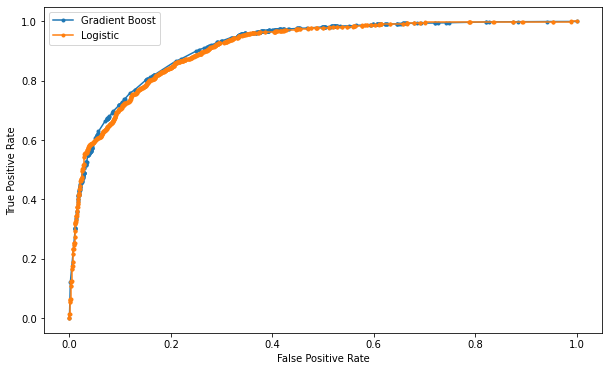

In [1047]:
gb_probs = y_probs[:,[1]]
gb_auc = roc_auc_score(y_train, gb_probs)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves

gb_fpr, gb_tpr, thr = roc_curve(y_train, gb_probs)
# plot the roc curve for the model # pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: ROC AUC=0.904


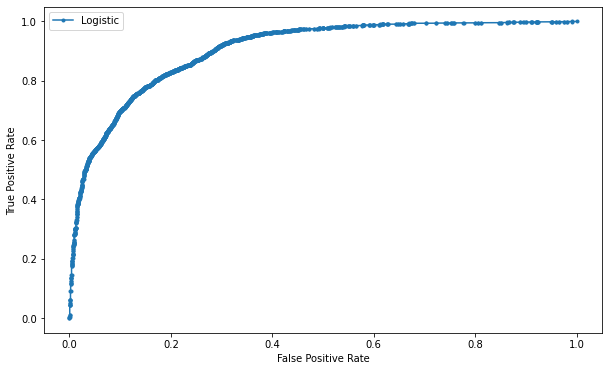

In [1048]:
lr_probs = probs[:,[1]]
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

lr_fpr, lr_tpr, thr = roc_curve(y_train, lr_probs)
# plot the roc curve for the model # pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [1049]:
y_probs = gb_classifier.predict_proba(X_test)

Logistic: ROC AUC=0.919


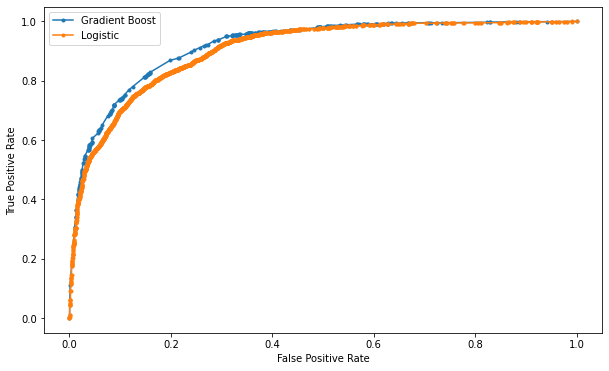

In [1050]:
gb_probs = y_probs[:,[1]]
gb_auc = roc_auc_score(y_test, gb_probs)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves

gb_fpr, gb_tpr, thr = roc_curve(y_test, gb_probs)
# plot the roc curve for the model # pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [1051]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

gb_classifier1 = GradientBoostingClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(gb_classifier1, param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.81      0.83      1478
         1.0       0.81      0.86      0.83      1440

    accuracy                           0.83      2918
   macro avg       0.83      0.83      0.83      2918
weighted avg       0.83      0.83      0.83      2918



# Best Model Analysis
The best meta model was found to be GradientBoost. here after hyperparameter tuning we found the accuracy score to be 0.73
Now we will see if we can custom threshold and improve acuraccy.

In [1052]:
probsdf_test['GBprobs_0']=gb_classifier.predict_proba(X_test)[:,0]
probsdf_test['GBprobs_1']=gb_classifier.predict_proba(X_test)[:,1]
probsdf_test.head()

,trth,label_pol_pred,tb,vader,bert,flair,textblob_polarity,vader_polarity,bert_polarity,flair_polarity,Headline,GBprobs_0,GBprobs_1
0,-1.0,-1.0,0.000000,0.0000,-0.926111,-0.999858,1.0,1.0,-1.0,-1.0,"Me too , it's so unreliable .",0.859740,0.140260
1,1.0,1.0,0.000000,0.4574,0.834455,0.998365,1.0,1.0,1.0,1.0,@sonya_jonsgirl yes! There ya go,0.161737,0.838263
2,1.0,1.0,0.000000,0.0000,0.000000,0.988985,1.0,1.0,1.0,1.0,How have you been ?,0.333466,0.666534
3,-1.0,-1.0,0.091667,0.7256,-0.597453,-0.999997,1.0,1.0,-1.0,-1.0,To small to week even for the smallest of spac...,0.823073,0.176927
4,1.0,1.0,0.000000,0.5719,0.000000,0.965863,1.0,1.0,1.0,1.0,Shall we go to a restaurant to celebrate ?,0.318194,0.681806


In [1053]:
def Gb_polarity(val):
    if val >= 0.5:
        return 1
    else:
        return -1

In [1054]:
probsdf_test['GBoost_polarity']= probsdf_test.apply (lambda x : Gb_polarity(x['GBprobs_1']),axis=1)
probsdf_test['GBoost_Pred']=gb_classifier.predict(X_test)

In [1055]:
probsdf_test.head()

,trth,label_pol_pred,tb,vader,bert,flair,textblob_polarity,vader_polarity,bert_polarity,flair_polarity,Headline,GBprobs_0,GBprobs_1,GBoost_polarity,GBoost_Pred
0,-1.0,-1.0,0.000000,0.0000,-0.926111,-0.999858,1.0,1.0,-1.0,-1.0,"Me too , it's so unreliable .",0.859740,0.140260,-1,-1.0
1,1.0,1.0,0.000000,0.4574,0.834455,0.998365,1.0,1.0,1.0,1.0,@sonya_jonsgirl yes! There ya go,0.161737,0.838263,1,1.0
2,1.0,1.0,0.000000,0.0000,0.000000,0.988985,1.0,1.0,1.0,1.0,How have you been ?,0.333466,0.666534,1,1.0
3,-1.0,-1.0,0.091667,0.7256,-0.597453,-0.999997,1.0,1.0,-1.0,-1.0,To small to week even for the smallest of spac...,0.823073,0.176927,-1,-1.0
4,1.0,1.0,0.000000,0.5719,0.000000,0.965863,1.0,1.0,1.0,1.0,Shall we go to a restaurant to celebrate ?,0.318194,0.681806,1,1.0


### Stacked Ensemble with Meta Model as LR : fused_data

/Users/amitobe/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amitobe/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amitobe/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

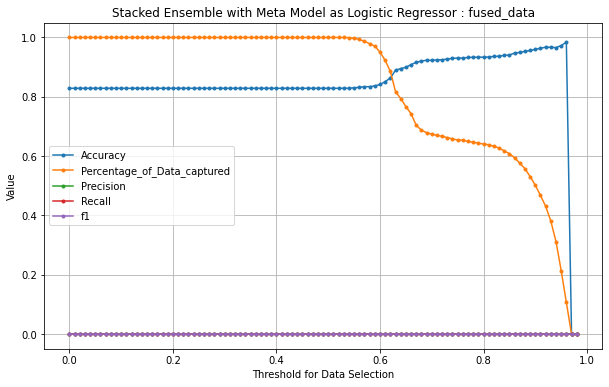

In [1144]:

threshold_analysis = pd.DataFrame({'Thresh_alpha':[0],'Accuracy':[0],'Percent_data_capture':[0],'Precision':[0],'Recall':[0],'f1':[0]})
detl_threshold = pd.DataFrame({'Thresh_alpha':[],'Accuracy':[],'Percent_data_capture':[],'Precision':[],'Recall':[],'f1':[]})
for i in range (0,99):
    alpha_th = i*.01
    res1 = pd.DataFrame(classification_report(probsdf_test['trth'][(probsdf_test[0]>=alpha_th)|(probsdf_test[1]>=alpha_th)],probsdf_test['label_pol_pred'][(probsdf_test[0]>=alpha_th)|(probsdf_test[1]>=alpha_th)],output_dict=True))
    threshold_analysis['Accuracy']= res1['accuracy'].iloc[0]
    threshold_analysis['Percent_data_capture'] = probsdf_test['trth'][(probsdf_test[0]>=alpha_th)|(probsdf_test[1]>=alpha_th)].count()/probsdf_test[0].count()
    threshold_analysis['Thresh_alpha'] = alpha_th
    try:
        threshold_analysis['Precision'] = res1['1'].loc['precision']
        threshold_analysis['Recall'] = res1['1'].loc['recall']
        threshold_analysis['f1'] = res1['1'].loc['f1-score']
    except KeyError:
        threshold_analysis['Precision'] = 0
        threshold_analysis['Recall'] = 0
        threshold_analysis['f1'] = 0
    detl_threshold = detl_threshold.append(threshold_analysis)

plt.rcParams['figure.figsize'] = [10, 6]
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Accuracy'], marker='.', label='Accuracy')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Percent_data_capture'], marker='.', label='Percentage_of_Data_captured')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Precision'], marker='.', label='Precision')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Recall'], marker='.', label='Recall')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['f1'], marker='.', label='f1')
pyplot.xlabel('Threshold for Data Selection')
pyplot.ylabel('Value')
pyplot.grid(visible=True, which='both', axis='both')
#pyplot.grid(True)
pyplot.title('Stacked Ensemble with Meta Model as Logistic Regressor : fused_data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Stacked Ensemble with Meta Model as GradientBoost : fused_data

In [1145]:
threshold_analysis = pd.DataFrame({'Thresh_alpha':[0],'Accuracy':[0],'Percent_data_capture':[0],'Precision':[0],'Recall':[0],'f1':[0]})
detl_threshold = pd.DataFrame({'Thresh_alpha':[],'Accuracy':[],'Percent_data_capture':[],'Precision':[],'Recall':[],'f1':[]})
for i in range (0,99):
    alpha_th = i*.01
    res1 = pd.DataFrame(classification_report(probsdf_test['trth'][(probsdf_test['GBprobs_1']>alpha_th) | (probsdf_test['GBprobs_0']>alpha_th)],probsdf_test['GBoost_Pred'][(probsdf_test['GBprobs_1']>alpha_th) | (probsdf_test['GBprobs_0']>alpha_th)],output_dict=True))
    threshold_analysis['Accuracy']= res1['accuracy'].iloc[0]
    threshold_analysis['Percent_data_capture'] = probsdf_test['trth'][(probsdf_test['GBprobs_1']>alpha_th) | (probsdf_test['GBprobs_0']>alpha_th)].count()/probsdf_test['GBprobs_1'].count()
    threshold_analysis['Thresh_alpha'] = alpha_th
    try:
        threshold_analysis['Precision'] = res1['1'].loc['precision']
        threshold_analysis['Recall'] = res1['1'].loc['recall']
        threshold_analysis['f1'] = res1['1'].loc['f1-score']
    except KeyError:
        threshold_analysis['Precision'] = 0
        threshold_analysis['Recall'] = 0
        threshold_analysis['f1'] = 0
    detl_threshold = detl_threshold.append(threshold_analysis)

plt.rcParams['figure.figsize'] = [10, 6]
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Accuracy'], marker='.', label='Accuracy')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Percent_data_capture'], marker='.', label='Percentage_of_Data_captured')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Precision'], marker='.', label='Precision')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['Recall'], marker='.', label='Recall')
pyplot.plot(detl_threshold['Thresh_alpha'], detl_threshold['f1'], marker='.', label='f1')
pyplot.xlabel('Threshold for Data Selection')
pyplot.ylabel('Value')
pyplot.grid(visible=True, which='both', axis='both')
#pyplot.grid(True)
pyplot.title('Stacked Ensemble with Meta Model as GradientBoost : fused_data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

KeyError: 'GBprobs_1'

In [1146]:
probsdf_test = probsdf_test[['label_pol_pred','GBoost_Pred','textblob_polarity','flair_polarity','vader_polarity','bert_polarity','trth']].astype(float)
corr_analysis = probsdf_test[['label_pol_pred','GBoost_Pred','textblob_polarity','flair_polarity','vader_polarity','bert_polarity','trth']].corr()

KeyError: "['GBoost_Pred'] not in index"

In [1147]:
corr_analysis

,label_pol_pred,GBoost_Pred,textblob_polarity,flair_polarity,vader_polarity,bert_polarity,trth
label_pol_pred,1.000000,0.950783,0.322240,0.756348,0.452040,0.736258,0.644945
GBoost_Pred,0.950783,1.000000,0.317241,0.768623,0.438606,0.726972,0.660194
textblob_polarity,0.322240,0.317241,1.000000,0.252968,0.367885,0.354919,0.286404
flair_polarity,0.756348,0.768623,0.252968,1.000000,0.364218,0.509617,0.537725
vader_polarity,0.452040,0.438606,0.367885,0.364218,1.000000,0.466802,0.394639
bert_polarity,0.736258,0.726972,0.354919,0.509617,0.466802,1.000000,0.639405
trth,0.644945,0.660194,0.286404,0.537725,0.394639,0.639405,1.000000


In [1148]:
probsdf_test[['label_pol_pred','GBoost_Pred','textblob_polarity','flair_polarity','vader_polarity','bert_polarity','trth']].corr().to_csv('fused_final_corrdata.csv')

KeyError: "['GBoost_Pred'] not in index"

In [1149]:
plt.hist(probsdf_test['GBprobs_0'])

KeyError: 'GBprobs_0'

In [1150]:
dat = corr_analysis['trth'].to_numpy()

In [1151]:
zz = corr_analysis.index

<BarContainer object of 7 artists>

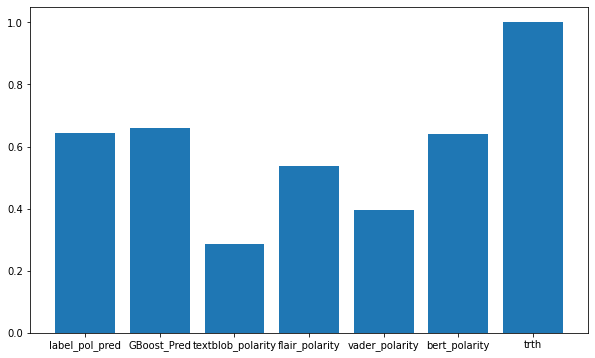

In [1152]:

matplotlib.pyplot.bar(zz,dat)

In [1153]:
zz.to_list()

['label_pol_pred',
 'GBoost_Pred',
 'textblob_polarity',
 'flair_polarity',
 'vader_polarity',
 'bert_polarity',
 'trth']

In [1154]:
dat

array([0.64494521, 0.66019383, 0.28640369, 0.53772508, 0.39463905,
       0.6394045 , 1.        ])

# Final Analysis LR vs GBoost

In [1155]:
alpha_th_test = 0
pd.DataFrame(metrics.classification_report(probsdf_test['trth'][(probsdf_test['GBprobs_1']>alpha_th_test) | (probsdf_test['GBprobs_0']>alpha_th_test)],probsdf_test['GBoost_Pred'][(probsdf_test['GBprobs_1']>alpha_th_test) | (probsdf_test['GBprobs_0']>alpha_th_test)],output_dict=True))

KeyError: 'GBprobs_1'

In [1156]:
alpha_th_test = 0
pd.DataFrame(metrics.classification_report(probsdf_test['trth'][(probsdf_test[0]>alpha_th_test) | (probsdf_test[1]>alpha_th_test)],probsdf_test['label_pol_pred'][(probsdf_test[0]>alpha_th_test) | (probsdf_test[1]>alpha_th_test)],output_dict=True))

,-1.0,1.0,accuracy,macro avg,weighted avg
precision,0.835399,0.821965,0.82865,0.828682,0.828751
recall,0.822931,0.834488,0.82865,0.828709,0.828650
f1-score,0.829118,0.828179,0.82865,0.828648,0.828653
support,1474.000000,1444.000000,0.82865,2918.000000,2918.000000


In [1157]:
probsdf_test.head()

,trth,0,1,label_pol_pred,tb,vader,bert,flair,textblob_polarity,vader_polarity,bert_polarity,flair_polarity,Headline
0,-1.0,0.936240,0.063760,-1.0,0.000000,-0.4449,-0.838282,-0.999628,1.0,-1.0,-1.0,-1.0,@richardcalhoun Never believe the state / BB...
1,-1.0,0.255369,0.744631,1.0,0.003704,0.2714,0.601085,-0.911656,1.0,1.0,1.0,-1.0,@renehasp Howdy! Tough to have a fun day when ...
2,-1.0,0.886741,0.113259,-1.0,0.002778,-0.2164,-0.613837,-0.946635,1.0,-1.0,-1.0,-1.0,Heading to bed forreal this time.. Tryna fall ...
3,1.0,0.328482,0.671518,1.0,0.000000,0.3818,0.000000,0.956065,1.0,1.0,1.0,1.0,Police stations will ensure door delivery of f...
4,1.0,0.044089,0.955911,1.0,0.800000,0.7430,0.918201,0.998509,1.0,1.0,1.0,1.0,"Yeah , those classics from the great writers ."


In [1158]:
fused_vader_acc = pd.DataFrame(metrics.classification_report(dataset_analysis['Sentiment'], dataset_analysis['vader_polarity'],output_dict=True))
fused_tb_acc = pd.DataFrame(metrics.classification_report(dataset_analysis['Sentiment'], dataset_analysis['textblob_polarity'],output_dict=True))
fused_bert_acc = pd.DataFrame(metrics.classification_report(dataset_analysis['Sentiment'], dataset_analysis['bert_polarity'],output_dict=True))
fused_flair_acc = pd.DataFrame(metrics.classification_report(dataset_analysis['Sentiment'], dataset_analysis['flair_polarity'],output_dict=True))

alpha_th_test = 0
fused_gboost_acc = pd.DataFrame(metrics.classification_report(probsdf_test['trth'][(probsdf_test['GBprobs_1']>alpha_th_test) | (probsdf_test['GBprobs_0']>alpha_th_test)],probsdf_test['GBoost_Pred'][(probsdf_test['GBprobs_1']>alpha_th_test) | (probsdf_test['GBprobs_0']>alpha_th_test)],output_dict=True))
fused_LR_acc = pd.DataFrame(metrics.classification_report(probsdf_test['trth'][(probsdf_test[0]>alpha_th_test) | (probsdf_test[1]>alpha_th_test)],probsdf_test['label_pol_pred'][(probsdf_test[0]>alpha_th_test) | (probsdf_test[1]>alpha_th_test)],output_dict=True))
fused_acc_compare = pd.DataFrame({'Dataset':'fused_data','Log_reg_meta':[0],'GBoost_meta':[0],'VADER':[0],'TextBlob':[0],'Flair':[0],'BERT':[0]})
fused_acc_compare['GBoost_meta'].iloc[0]=fused_gboost_acc['accuracy'].loc['precision']
fused_acc_compare['Log_reg_meta'].iloc[0]=fused_LR_acc['accuracy'].loc['precision']
fused_acc_compare['VADER'].iloc[0]=fused_vader_acc['accuracy'].loc['precision']
fused_acc_compare['BERT'].iloc[0]=fused_bert_acc['accuracy'].loc['precision']
fused_acc_compare['Flair'].iloc[0]=fused_flair_acc['accuracy'].loc['precision']
fused_acc_compare['TextBlob'].iloc[0]=fused_tb_acc['accuracy'].loc['precision']
fused_acc_compare.to_csv('fused_acc_analysis.csv')
fused_acc_compare

KeyError: 'GBprobs_1'

# DISREGARD CODE BELOW

## fused 2017 Test Data Analysis
Here we found that this dataset is the same as the original dataset 
So below we test the Log Regressor on the entire ensemble and see results once again
We find consistent accuraccy

In [1159]:
fused_acc_compare

,Dataset,Log_reg_meta,GBoost_meta,VADER,TextBlob,Flair,BERT
0,fused_data,0.822481,0.830021,0.682089,0.621427,0.774111,0.79889


In [1160]:
gb_classifier

GradientBoostingClassifier(learning_rate=0.01, n_estimators=150,
                           random_state=42)

In [1161]:
import joblib

In [1162]:
joblib.dump(gb_classifier,'fused_gb_classifier.pkl')

['fused_gb_classifier.pkl']

In [1163]:
joblib.dump(logmodel,'fused_logmodel.pkl')

['fused_logmodel.pkl']

In [1164]:
probsdf_test.head()


,trth,0,1,label_pol_pred,tb,vader,bert,flair,textblob_polarity,vader_polarity,bert_polarity,flair_polarity,Headline
0,-1.0,0.936240,0.063760,-1.0,0.000000,-0.4449,-0.838282,-0.999628,1.0,-1.0,-1.0,-1.0,@richardcalhoun Never believe the state / BB...
1,-1.0,0.255369,0.744631,1.0,0.003704,0.2714,0.601085,-0.911656,1.0,1.0,1.0,-1.0,@renehasp Howdy! Tough to have a fun day when ...
2,-1.0,0.886741,0.113259,-1.0,0.002778,-0.2164,-0.613837,-0.946635,1.0,-1.0,-1.0,-1.0,Heading to bed forreal this time.. Tryna fall ...
3,1.0,0.328482,0.671518,1.0,0.000000,0.3818,0.000000,0.956065,1.0,1.0,1.0,1.0,Police stations will ensure door delivery of f...
4,1.0,0.044089,0.955911,1.0,0.800000,0.7430,0.918201,0.998509,1.0,1.0,1.0,1.0,"Yeah , those classics from the great writers ."


In [1177]:
probsdf_test[['Headline',0]][probsdf_test[0]>.95].sort_values(by=0,ascending=False)

,Headline,0
2451,This was one of the worst albums I have ever l...,0.955656
1191,@FIAO wtf this is DISGUSTING! ughhh u sound li...,0.955489
2108,It was boring . The music was too slow and th...,0.954830
304,It was a waste of money. Especially because th...,0.954803
2567,"Unfortunately the options of ""no stars"" is not...",0.954688
...,...,...
1375,This is just a bad album pure and simple... Th...,0.950235
2200,@Microsoft support for 365 has been terrible. ...,0.950161
91,"Stupid girl , making me spend so much money , ...",0.950116
2389,I DIDN'T REALLY LIKE THIS MOVIE IT HARDLY KEPT...,0.950040


In [1179]:
probsdf_test[['Headline',1]][probsdf_test[1]>.961].sort_values(by=1,ascending=False)

,Headline,1
1299,Thank you to all the awesome people who suppor...,0.964308
908,"Such a good day in Edinburgh! Sightseeing, har...",0.964209
2141,Thanks again to all who helped make this a suc...,0.964204
886,This DVD is amazing! Breathtaking! The concert...,0.964168
918,dreamworks presnts two new shorts. gift of the...,0.964118
...,...,...
1501,"so nice to see you again , Louise . How are yo...",0.961046
1276,@SUFCRootsHall Bentley superb. Good work ethic...,0.961036
619,Valentine dyall's velvet tones are great in th...,0.961029
2737,This year I will be the gifter all my family w...,0.961015


In [1183]:
probsdf_test[['Headline',0]][probsdf_test[0]>.95].sort_values(by=0,ascending=False).to_csv('highly_negative.csv')
probsdf_test[['Headline',1]][probsdf_test[1]>.961].sort_values(by=1,ascending=False).to_csv('highly_positive.csv')

In [1186]:
neg_hl = probsdf_test[['Headline',0]][probsdf_test[0]>.95].sort_values(by=0,ascending=False)

In [1200]:
neg_hl[0]

2451    0.955656
1191    0.955489
2108    0.954830
304     0.954803
2567    0.954688
          ...   
1375    0.950235
2200    0.950161
91      0.950116
2389    0.950040
1907    0.950004
Name: 0, Length: 62, dtype: float64

In [1203]:
neg_hl1 = neg_hl[['Headline',0]]


In [1206]:
print(neg_hl1.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                                          Headline &        0 \\
\midrule
This was one of the worst albums I have ever li... & 0.955656 \\
@FIAO wtf this is DISGUSTING! ughhh u sound lik... & 0.955489 \\
 It was boring . The music was too slow and the... & 0.954830 \\
It was a waste of money. Especially because the... & 0.954803 \\
Unfortunately the options of "no stars" is not ... & 0.954688 \\
Woke up sick. Missed out on outing today so not... & 0.954483 \\
Recently purchased a copy from "surfvideo.com",... & 0.953990 \\
David Cameron U bloody moron f**k U how dare u ... & 0.953713 \\
 I got caught cheating . I feel so ashamed . Th... & 0.953678 \\
This CD is a huge disappointment! Why did they ... & 0.953549 \\
I knew right from the start that this wasn't an... & 0.953130 \\
 I hate the bus system in London ! The bus driv... & 0.953117 \\
it sucked i don't think u should get it the act... & 0.953101 \\
 No , no ! Stupid machine , what are you doing ... &